In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cv19gm.models.seir_meta import SEIRMETA
import cv19gm.utils.cv19mobility as cv19mob
import time

# Meta-population SEIR model with 3 regions

## Build flux function

In [2]:
population = np.array([100000,200000,150000])
Phi, Phi_T = cv19mob.rnd_flux(population=population,fraction=0.25,transposed=True)

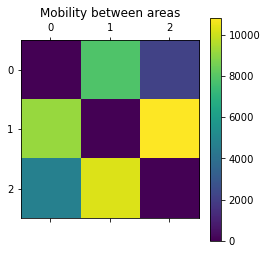

In [3]:
plt.matshow(Phi(0))
plt.title('Mobility between areas')
plt.colorbar()
plt.show()

In [4]:
beta = np.array([0.2,0.15,0.11])
mu = np.array([1,0.8,1.2])


I = np.array([1000,0,1500])
I_d = np.array([100,0,150])
R = np.array([5000,10000,7500])
I_ac = np.array([4500,9000,6500])

rR_S = 0

#E = False
#E_d = False
popfraction = 1  # np.array([1,1,1])

In [5]:
cfg = '/home/samuel/covid19geomodeller/config_files/SEIRMETA.toml'

In [6]:
NMethods = 5

In [7]:
# Create similar models using different instantiation of the Phi matrices using the "method" parameter
model = []
for i in range(NMethods):
    model.append(SEIRMETA(config=cfg,beta=beta,mu=mu,population=population,I=I,I_d=I_d,R=R,I_ac=I_ac,Phi=Phi,Phi_T = Phi_T, rR_S=rR_S,t_end=500, method = i, seed = 0))

Entré al if
Entré al if
Entré al if
Entré al if
Entré al if


In [8]:
for sim in model:
    init = time.time()
    sim.solve()
    end = time.time()
    print("Method "+str(sim.method)+" took "+str(end-init)+" seconds to complete")



Method 0 took 20.90155339241028 seconds to complete
Method 1 took 13.825860261917114 seconds to complete
Method 2 took 13.583847522735596 seconds to complete
Method 3 took 12.215933322906494 seconds to complete
Method 4 took 12.642848253250122 seconds to complete


## Results comparison

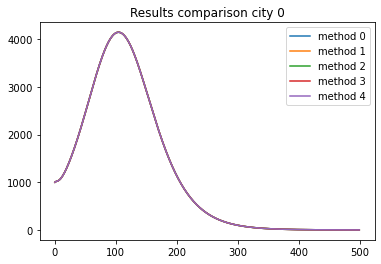

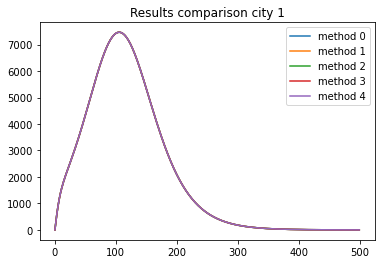

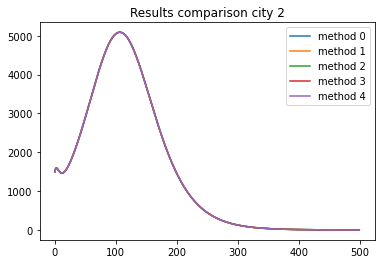

In [9]:
for j in range(len(population)):
    for sim in model:
        plt.plot(sim.t,sim.I[j],label="method "+str(sim.method))
    plt.legend(loc=0)
    plt.title("Results comparison city "+str(j))
    plt.show()

-------

In [1]:
import sympy

In [30]:
A = sympy.Matrix([['a1','a2','a3'],['a4','a5','a6'],['a7','a8','a9']])

In [31]:
C = sympy.Matrix(['c1','c2','c3'])

In [32]:
C_diag = sympy.diag(*C)

In [33]:
ones = sympy.ones(rows = 3, cols = 1)

In [34]:
A*C - C_diag*A*ones

Matrix([
[-a2*c1 + a2*c2 - a3*c1 + a3*c3],
[ a4*c1 - a4*c2 - a6*c2 + a6*c3],
[ a7*c1 - a7*c3 + a8*c2 - a8*c3]])

In [38]:
A.transpose()*C - C_diag*A*ones 

Matrix([
[-a2*c1 - a3*c1 + a4*c2 + a7*c3],
[ a2*c1 - a4*c2 - a6*c2 + a8*c3],
[ a3*c1 + a6*c2 - a7*c3 - a8*c3]])

In [41]:
# Original
sympy.Matrix([['-a2 -a3','a4','a7'],['a2','-a4 - a6','a8'],['a3','a6','-a7 - a8']])

Matrix([
[-a2 - a3,       a4,       a7],
[      a2, -a4 - a6,       a8],
[      a3,       a6, -a7 - a8]])

In [42]:
# No transponse
sympy.Matrix([['-a2 -a3','a2','a3'],['a4','-a4 - a6','a6'],['a7','a8','-a7 - a8']])

Matrix([
[-a2 - a3,       a2,       a3],
[      a4, -a4 - a6,       a6],
[      a7,       a8, -a7 - a8]])

In [36]:
C_diag*A*ones

Matrix([
[a1*c1 + a2*c1 + a3*c1],
[a4*c2 + a5*c2 + a6*c2],
[a7*c3 + a8*c3 + a9*c3]])

In [37]:
C_diag

Matrix([
[c1,  0,  0],
[ 0, c2,  0],
[ 0,  0, c3]])

In [29]:
C

Matrix([
[c1],
[c2],
[c3]])